In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [3]:
# Question 1: Load and inspect the dataset

data = pd.read_csv('CarPrice_Assignment.csv')

print("First five rows of the dataset:")
print(data.head())
print("\nDataset Information:")
print(data.info())
print("\nStatistical Summary:")
print(data.describe())



First five rows of the dataset:
   car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionrati

In [4]:
# Question 2: Preprocess the data
print("\nHandling missing values...")
data = data.dropna()
print("Missing values removed.")

categorical_cols = data.select_dtypes(include=['object']).columns
print(f"Encoding categorical columns: {categorical_cols.tolist()}")
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])

numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
print(f"Scaling numerical columns: {numerical_cols.tolist()}")
scaler = StandardScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

X = data.drop('price', axis=1)  # Replace 'price' with the actual target column
y = data['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Data split into training and testing sets.")



Handling missing values...
Missing values removed.
Encoding categorical columns: ['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']
Scaling numerical columns: ['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']
Data split into training and testing sets.


In [5]:
# Question 3: Implement regression models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'Support Vector Regressor': SVR()
}

results = {}
print("\nTraining and evaluating models...")
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    results[name] = {'R-squared': r2, 'MSE': mse, 'MAE': mae}

results_df = pd.DataFrame(results).T
print("\nModel Performance:")
print(results_df)


Training and evaluating models...

Model Performance:
                          R-squared       MSE       MAE
Linear Regression          0.844116  0.193765  0.261917
Decision Tree              0.881258  0.147597  0.252788
Random Forest              0.955132  0.055771  0.166297
Gradient Boosting          0.933093  0.083166  0.200322
Support Vector Regressor   0.855063  0.180158  0.280513



Feature importance (Random Forest):
             Feature  Importance
16        enginesize    0.549268
13        curbweight    0.294416
24        highwaympg    0.044051
21        horsepower    0.031000
0             car_ID    0.015412
11          carwidth    0.011942
2            CarName    0.009695
10         carlength    0.006877
9          wheelbase    0.006073
23           citympg    0.005085
22           peakrpm    0.004898
19            stroke    0.004234
18         boreratio    0.004042
12         carheight    0.003040
20  compressionratio    0.002319
17        fuelsystem    0.001949
6            carbody    0.001504
14        enginetype    0.000944
1          symboling    0.000799
7         drivewheel    0.000743
4         aspiration    0.000703
5         doornumber    0.000420
15    cylindernumber    0.000396
3           fueltype    0.000169
8     enginelocation    0.000021


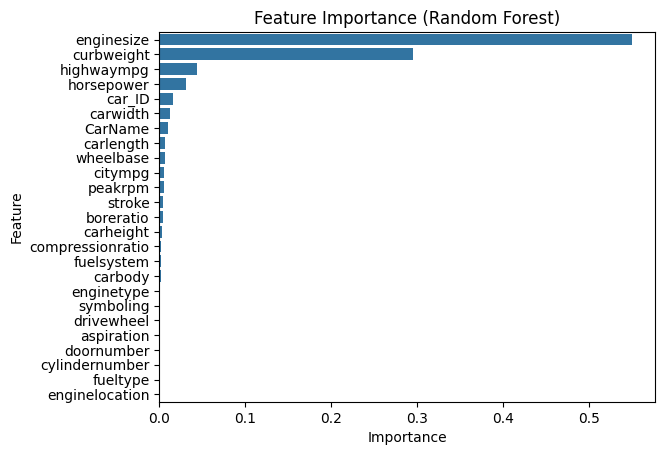

In [6]:
# Question 4: Analyze feature importance
if 'Random Forest' in models:
    rf_model = models['Random Forest']
    feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': rf_model.feature_importances_})
    feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

    print("\nFeature importance (Random Forest):")
    print(feature_importances)

    sns.barplot(x='Importance', y='Feature', data=feature_importances)
    plt.title('Feature Importance (Random Forest)')
    plt.show()

In [7]:
# Question 5: Hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

print("\nPerforming hyperparameter tuning for Random Forest...")
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, scoring='r2')
grid_search.fit(X_train, y_train)

print("Best parameters for Random Forest:", grid_search.best_params_)
best_rf_model = grid_search.best_estimator_
tuned_y_pred = best_rf_model.predict(X_test)

print("Improved R-squared after tuning:", r2_score(y_test, tuned_y_pred))



Performing hyperparameter tuning for Random Forest...
Best parameters for Random Forest: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}
Improved R-squared after tuning: 0.956590801213189


In [8]:
# Save results
results_df.to_csv('model_results.csv')
print("Results saved to 'model_results.csv'.")


Results saved to 'model_results.csv'.
